# Fig. 5 - Observational simulator

This Jupyter notebooks reproduces Figure 4. The output .png and .pdf files are saved in <em>/figures</em>. The GCM spectra are used to simulate a 3D HRS data set within an observational framework

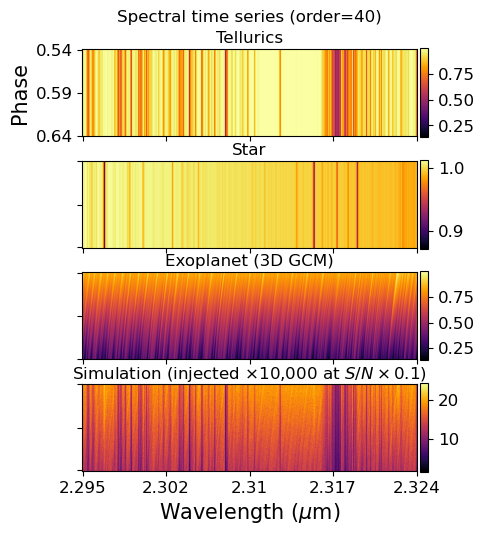

In [3]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec


norder = 40
dirin = '../data/sims_steps/'
fs_sts = fits.getdata(dirin + f'fs_sts_{norder}.fits')
fp_sts_s = fits.getdata(dirin + f'fp_sts_s_{norder}.fits')
fp_sts_s_2 = fits.getdata(dirin + f'fp_sts_s_{norder}.fits')
tt = fits.getdata(dirin + f'tt_sts_{norder}.fits')[0,:]
tt_sts = np.zeros(fs_sts.shape)
for i in range(tt_sts.shape[0]):
    tt_sts[i,:] = tt

f_sts = fits.getdata(dirin + f'raw_sts_a10000_{norder}.fits')

wl_fp_sts = fits.getdata(dirin + f'wl_fp_sts_{norder}.fits')
phase = np.loadtxt(dirin +'phase.txt')
nf, nx = f_sts.shape

fig = plt.figure(figsize=(7.5/1.68,5.5))
ar=4.5
gs = gridspec.GridSpec(ncols=2, nrows=4, width_ratios=[2,0.05], wspace=0.02, hspace=0.25)
ax1 = fig.add_subplot(gs[0,0])
cax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
cax2 = fig.add_subplot(gs[1,1])
ax3 = fig.add_subplot(gs[2,0])
cax3 = fig.add_subplot(gs[2,1])
ax4 = fig.add_subplot(gs[3,0])
cax4 = fig.add_subplot(gs[3,1])

ytl = np.round(np.linspace(phase.min(), 0.64, 3), 2)

im1 = ax1.imshow(tt_sts, aspect=ar, cmap='inferno')
cbar1 = plt.colorbar(mappable=im1, cax=cax1)
ax1.set_xticks([1,nx*0.25,nx*0.5,nx*0.75,nx])
ax1.set_xticklabels([])
ax1.set_yticks([0,nf*0.5,nf-1])
ax1.set_yticklabels(ytl, size=12)
cax1.tick_params(labelsize=12)
ax1.set_title(r'Tellurics', size=12, y=0.975)

im2 = ax2.imshow(fs_sts/np.median(fs_sts), aspect=ar, cmap='inferno')
cbar3 = plt.colorbar(mappable=im2, cax=cax2)
ax2.set_xticks([1,nx*0.25,nx*0.5,nx*0.75,nx])
ax2.set_xticklabels([])
ax2.set_yticks([0,nf*0.5,nf-1])
ax2.set_yticklabels(ytl, size=12)
ax2.set_yticklabels([])
cax2.tick_params(labelsize=12)
ax2.set_title(r'Star', size=12, y=0.975)

im3 = ax3.imshow(fp_sts_s/np.median(fp_sts_s), aspect=ar, cmap='inferno')
cbar3 = plt.colorbar(mappable=im1, cax=cax3)
ax3.set_xticks([1,nx*0.25,nx*0.5,nx*0.75,nx])
ax3.set_xticklabels([])
ax3.set_yticks([0,nf*0.5,nf-1])
ax3.set_yticklabels(ytl, size=12)
ax3.set_yticklabels([])
cax3.tick_params(labelsize=12)
ax3.set_title('Exoplanet (3D GCM)', size=12, y=0.975)
ax1.set_ylabel('Phase', size=15)

im4 = ax4.imshow(f_sts, aspect=ar, cmap='inferno')
cbar4 = plt.colorbar(mappable=im4, cax=cax4)
ax4.set_xticks([1,nx*0.25,nx*0.5,nx*0.75,nx])
ax4.set_xticklabels([])
ax4.set_yticks([0,nf*0.5,nf-1])
xtl = np.round(np.linspace(wl_fp_sts.min(), wl_fp_sts.max(), 5), 3)
ax4.set_xticklabels(xtl, size=12)
ax4.set_yticklabels(ytl, size=12)
ax4.set_yticklabels([])
cax4.tick_params(labelsize=12)
ax4.set_title(r'Simulation (injected $\times$10,000 at $S/N\times$0.1)', size=12, y=0.965)
ax4.set_xlabel(r'Wavelength ($\mu$m)', size=15)
plt.suptitle(f'Spectral time series (order={norder})', size=12,x=0.5,y=0.95)
plt.savefig('../figures/Fig5_observational_simulator.pdf', bbox_inches='tight')
plt.savefig('../figures/Fig5_observational_simulator.png', dpi=200, bbox_inches='tight')
plt.show()